In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

In [ ]:
###Download and explore data


In [2]:
data_path = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize"
# check dataset structure
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"{len(filenames)} images in '{dirpath}'")


0 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize'
803 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Blight'
915 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Common_Rust'
402 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Gray_Leaf_Spot'
814 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Healthy'


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
import os
os.listdir(r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize")


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [4]:
data_path = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize"
# check dataset structure
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"{len(filenames)} images in '{dirpath}'")


0 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize'
803 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Blight'
915 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Common_Rust'
402 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Gray_Leaf_Spot'
814 images in 'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\Healthy'


Visualising


In [5]:
import os, random
import matplotlib.pyplot as plt

def view_sample_images():
    base_path = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize"  # full dataset path
    classes = ['Blight', 'Healthy', 'Common_Rust', 'Gray_Leaf_Spot']

    fig, axes = plt.subplots(1, 4, figsize=(15, 3))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(base_path, class_name)
        if not os.path.exists(class_path):
            print(f"⚠️ Folder not found: {class_path}")
            continue

        sample_images = random.sample(os.listdir(class_path), 1)
        img_path = os.path.join(class_path, sample_images[0])
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


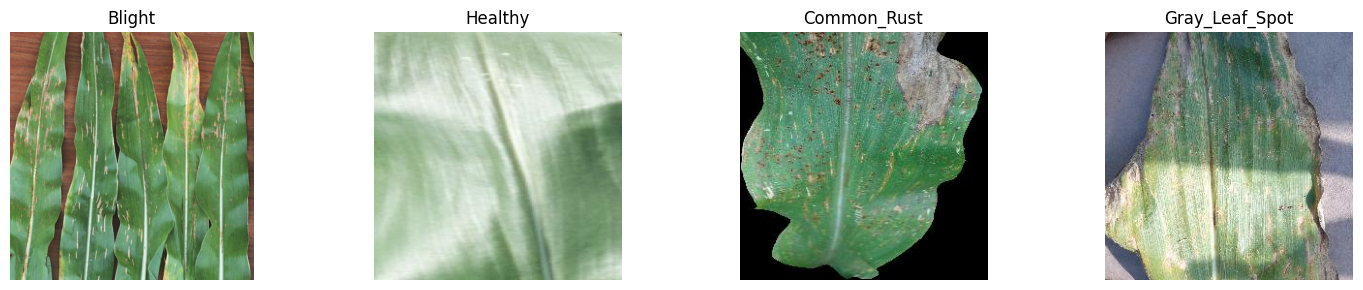

In [20]:
view_sample_images()

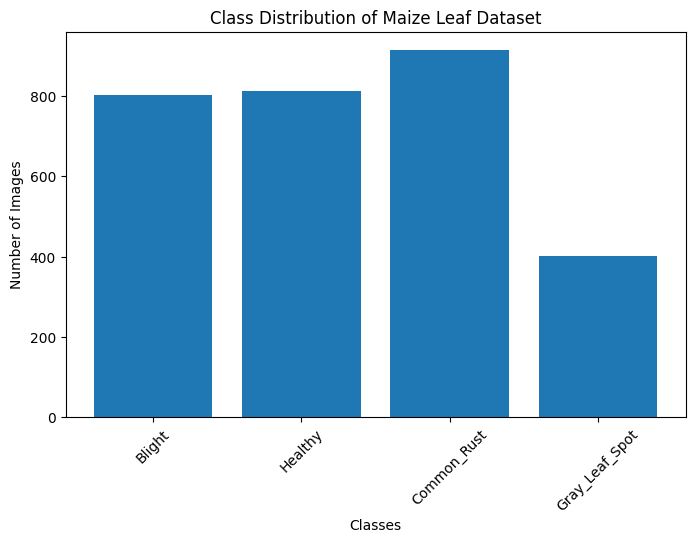

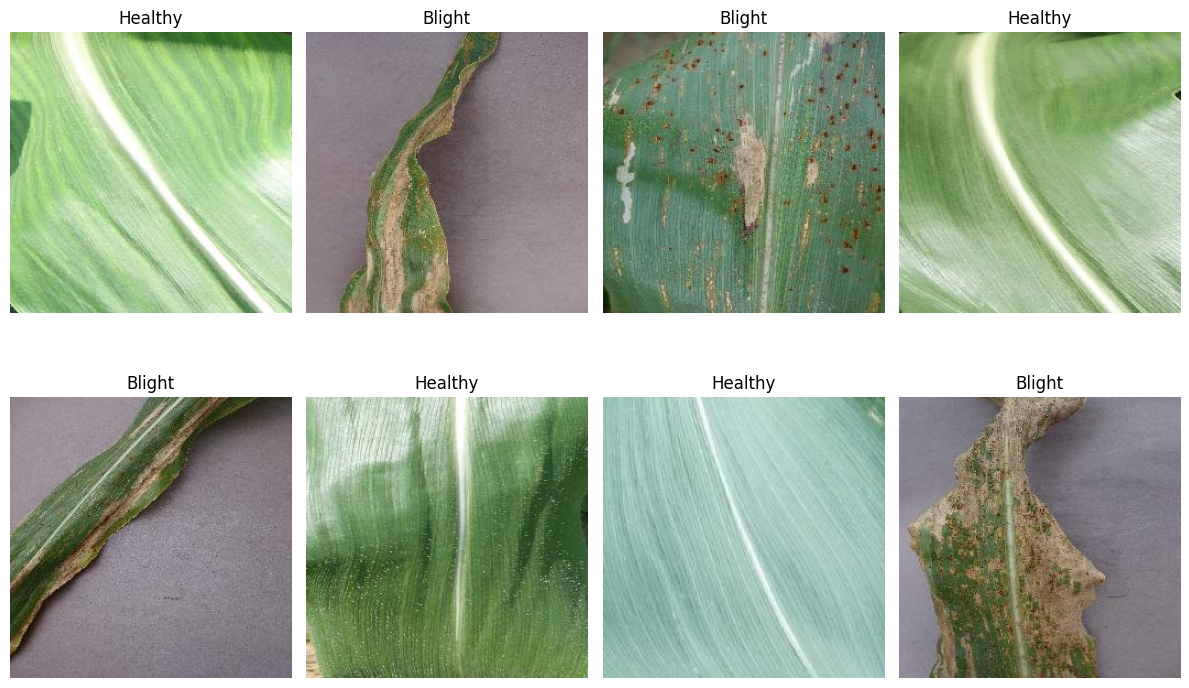

Average Image Height: 298.02
Average Image Width: 307.46


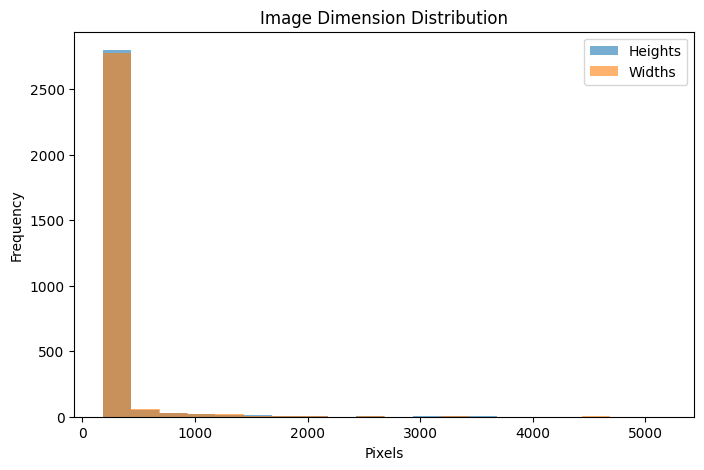

Corrupted or unreadable images found: 0


In [26]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# ---------------------------
# Configuration (from a)
# ---------------------------
base_path = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize"
classes = ['Blight', 'Healthy', 'Common_Rust', 'Gray_Leaf_Spot']

# ---------- Visualize Class Distribution ----------
class_counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}

plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution of Maize Leaf Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

# ---------- Display Random Images ----------
def show_random_images(base_path, classes, n=8):
    plt.figure(figsize=(12,8))
    for i in range(n):
        cls = random.choice(classes)
        img_name = random.choice(os.listdir(os.path.join(base_path, cls)))
        img_path = os.path.join(base_path, cls, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(base_path, classes)

# ---------- Image Quality & Dimensions ----------
img_sizes = []
for cls in classes:
    folder = os.path.join(base_path, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_sizes.append(img.shape)

# Show average size & sample shapes
heights = [s[0] for s in img_sizes]
widths = [s[1] for s in img_sizes]

print(f"Average Image Height: {np.mean(heights):.2f}")
print(f"Average Image Width: {np.mean(widths):.2f}")

# Plot image shapes distribution
plt.figure(figsize=(8,5))
plt.hist(heights, bins=20, alpha=0.6, label='Heights')
plt.hist(widths, bins=20, alpha=0.6, label='Widths')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# ---------- Check for corrupted images ----------
bad_images = []
for cls in classes:
    folder = Path(base_path) / cls
    for img_name in os.listdir(folder):
        img_path = folder / img_name
        try:
            img = cv2.imread(str(img_path))
            if img is None:
                bad_images.append(img_path)
        except:
            bad_images.append(img_path)

print(f"Corrupted or unreadable images found: {len(bad_images)}")
if bad_images:
    print("List of corrupted files (first 5):", bad_images[:5])


Data Preprocessing


In [6]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
print('GPU available:', tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.20.0
GPU available: []


In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam




In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

def build_finetune_model(num_classes, input_shape=(224,224,3)):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all but last 30 layers (fine-tune)
    for layer in base.layers[:-30]:
        layer.trainable = False
    for layer in base.layers[-30:]:
        layer.trainable = True

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base.input, outputs=out)
    return model

print("✅ Model builder ready")


✅ Model builder ready


Data Augmentation and Preprocessing



In [10]:
import math
batch_size = 32
img_size = (224, 224)
base_path = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize"


datagen = ImageDataGenerator(
  rescale=1./255,
  validation_split=0.2,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.15,
  zoom_range=0.2,
  horizontal_flip=True,
  brightness_range=[0.8, 1.2],
  fill_mode='nearest'
)


train_gen = datagen.flow_from_directory(
  base_path,
  target_size=img_size,
  batch_size=batch_size,
  subset='training'
)


val_gen = datagen.flow_from_directory(
  base_path,
  target_size=img_size,
  batch_size=batch_size,
  subset='validation'
)


num_classes = train_gen.num_classes
steps_per_epoch = math.ceil(train_gen.samples / batch_size)
validation_steps = math.ceil(val_gen.samples / batch_size)
print('Classes:', train_gen.class_indices)
print('Train samples:', train_gen.samples, 'Val samples:', val_gen.samples)
print('Steps per epoch:', steps_per_epoch, 'Validation steps:', validation_steps)

Found 2349 images belonging to 4 classes.
Found 585 images belonging to 4 classes.
Classes: {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Train samples: 2349 Val samples: 585
Steps per epoch: 74 Validation steps: 19


**Building** Model

In [11]:
from tensorflow.keras.optimizers import Adam

model = build_finetune_model(num_classes)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("✅ Model compiled and ready to train")


✅ Model compiled and ready to train


Train the Model


In [13]:
out_dir = r'C:\Users\USER\Documents\AI\computervision\computervision\data\maize\model_output'
os.makedirs(out_dir, exist_ok=True)
checkpoint_path = os.path.join(out_dir, 'best_model.h5')

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)
]

epochs = 15
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4889 - loss: 1.1524
Epoch 1: val_accuracy improved from None to 0.31282, saving model to C:\Users\USER\Documents\AI\computervision\computervision\data\maize\model_output\best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.5539 - loss: 1.0230 - val_accuracy: 0.3128 - val_loss: 1.5710 - learning_rate: 1.0000e-04
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6567 - loss: 0.8109
Epoch 2: val_accuracy improved from 0.31282 to 0.42735, saving model to C:\Users\USER\Documents\AI\computervision\computervision\data\maize\model_output\best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.6811 - loss: 0.7837 - val_accuracy: 0.4274 - val_loss: 2.2222 - learning_rate: 1.0000e-04
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7107 - loss: 0.6946
Epoch 3: val_accuracy improved from 0.42735 to 0.52650, saving model to C:\Users\USER\Documents\AI\computervision\computervision\data\maize\model_output\best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.7190 - loss: 0.6794 - val_accuracy: 0.5265 - val_loss: 1.4749 - learning_rate: 1.0000e-04
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7270 - loss: 0.6597
Epoch 4: val_accuracy did not improve from 0.52650
74/74 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.7352 - loss: 0.6436 - val_accuracy: 0.3607 - val_loss: 2.4815 - learning_rate: 1.0000e-04
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7814 - loss: 0.5981
Epoch 5: val_accuracy did not improve from 0.52650
74/74 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7816 - loss: 0.5907 - val_accuracy: 0.4239 - val_loss: 3.1217 - learning_rate: 1.0000e-04
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7768 - loss: 0.5617
Epoch 6: val_accuracy did not improve from 0.52650

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
74/74 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.7752 - loss: 0.5716 - val_accuracy:

74/74 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.7761 - loss: 0.5409 - val_accuracy: 0.7111 - val_loss: 0.7076 - learning_rate: 5.0000e-05
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8107 - loss: 0.5007
Epoch 8: val_accuracy did not improve from 0.71111
74/74 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.8046 - loss: 0.5034 - val_accuracy: 0.5692 - val_loss: 1.4610 - learning_rate: 5.0000e-05
Epoch 9/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8150 - loss: 0.5010
Epoch 9: val_accuracy did not improve from 0.71111
74/74 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.8161 - loss: 0.4681 - val_accuracy: 0.5692 - val_loss: 1.7222 - learning_rate: 5.0000e-05
Epoch 10/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8160 - loss: 0.4555
Epoch 10: val_accuracy did not improve from 0.71111

Epoch 10: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
74/74 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.8101 - loss: 0.4647 - val_accura

74/74 ━━━━━━━━━━━━━━━━━━━━ 360s 5s/step - accuracy: 0.8127 - loss: 0.4587 - val_accuracy: 0.7966 - val_loss: 0.4741 - learning_rate: 2.5000e-05
Epoch 12/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8094 - loss: 0.4348
Epoch 12: val_accuracy did not improve from 0.79658
74/74 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8127 - loss: 0.4478 - val_accuracy: 0.7299 - val_loss: 0.6523 - learning_rate: 2.5000e-05
Epoch 13/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8190 - loss: 0.4558
Epoch 13: val_accuracy did not improve from 0.79658
74/74 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8212 - loss: 0.4553 - val_accuracy: 0.6239 - val_loss: 0.9494 - learning_rate: 2.5000e-05
Epoch 14/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8143 - loss: 0.4275
Epoch 14: val_accuracy did not improve from 0.79658

Epoch 14: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
74/74 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8212 - loss: 0.4267 - val_ac

74/74 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8263 - loss: 0.4094 - val_accuracy: 0.8239 - val_loss: 0.4163 - learning_rate: 1.2500e-05
Restoring model weights from the end of the best epoch: 15.


Validation

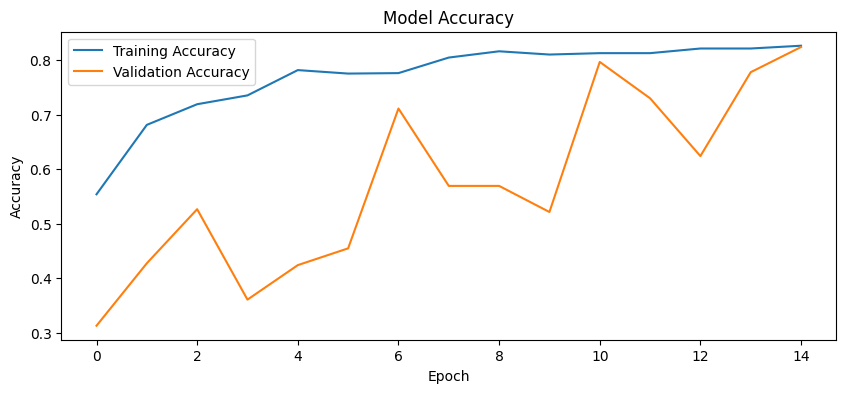

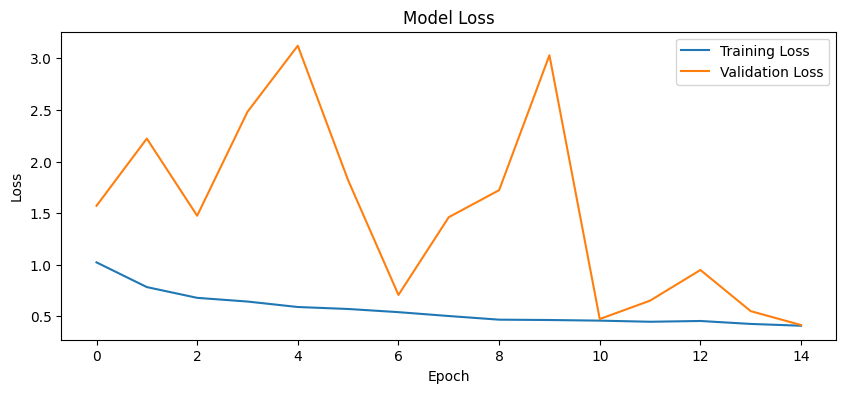

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------------
# Configuration
# -------------------------------
MODEL_PATH = r"C:\Users\USER\Documents\AI\computervision\computervision\data\maize\model_output\best_model.h5"
DATA_DIR = r"C:\Users\USER\Documents\AI\computervision\computervision\test data"
SAVE_DIR = r"C:\Users\USER\Documents\AI\Maize Disease Detection System\server\evaluation"
os.makedirs(SAVE_DIR, exist_ok=True)

# If you saved a label encoder:
LABEL_ENCODER_PATH = r"C:\Users\USER\Documents\AI\Maize Disease Detection System\server\artifacts\label_encoder.joblib"
label_encoder = joblib.load(LABEL_ENCODER_PATH)
inv_map = {v: k for k, v in label_encoder.items()}
class_names = list(label_encoder.keys())

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

print("Configuration loaded successfully")



Configuration loaded successfully


In [17]:
# Load trained model
model = load_model(MODEL_PATH)

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
num_classes = len(class_names)
print("Model loaded successfully")


Model loaded successfully


In [18]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    shuffle=False
)

Found 249 images belonging to 4 classes.


In [19]:
preds_proba = model.predict(val_gen)
y_pred = np.argmax(preds_proba, axis=1)
y_true = val_gen.classes

print("Predictions completed")
metrics_dict = {
    "Accuracy": [accuracy_score(y_true, y_pred)],
    "Precision": [precision_score(y_true, y_pred, average='weighted')],
    "Recall": [recall_score(y_true, y_pred, average='weighted')],
    "F1 Score": [f1_score(y_true, y_pred, average='weighted')]
}

df_metrics = pd.DataFrame(metrics_dict)
print(df_metrics)


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  
Predictions completed
   Accuracy  Precision    Recall  F1 Score
0  0.787149   0.789533  0.787149  0.777418


                precision  recall  f1-score  support
Blight              0.723   0.500     0.591   68.000
Common_Rust         0.765   1.000     0.867   78.000
Gray_Leaf_Spot      0.583   0.618     0.600   34.000
Healthy             0.984   0.913     0.947   69.000
accuracy            0.787   0.787     0.787    0.787
macro avg           0.764   0.758     0.751  249.000
weighted avg        0.790   0.787     0.777  249.000


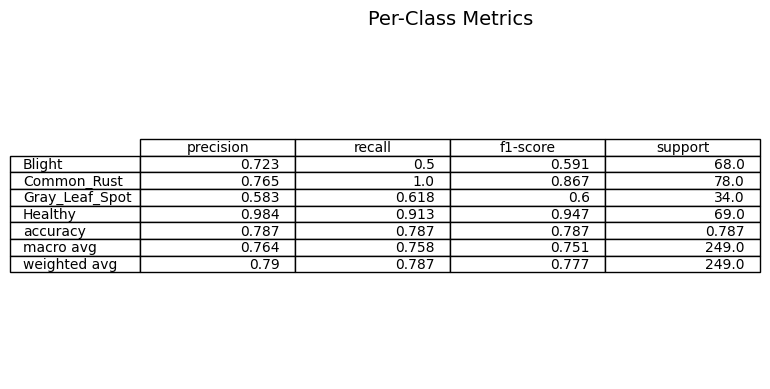

In [21]:

report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose().round(3)
print(df_report)
fig, ax = plt.subplots(figsize=(8, len(df_report)*0.5 + 1))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 rowLabels=df_report.index,
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Per-Class Metrics", fontsize=14)
plt.savefig(os.path.join(SAVE_DIR, "per_class_metrics.png"), bbox_inches='tight')
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


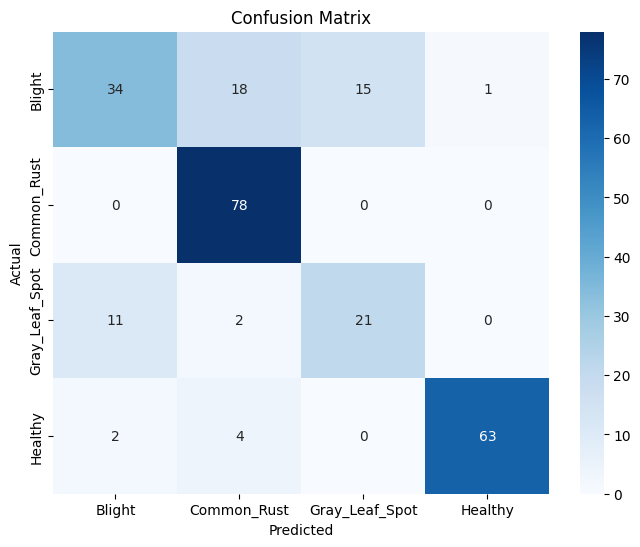

In [23]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


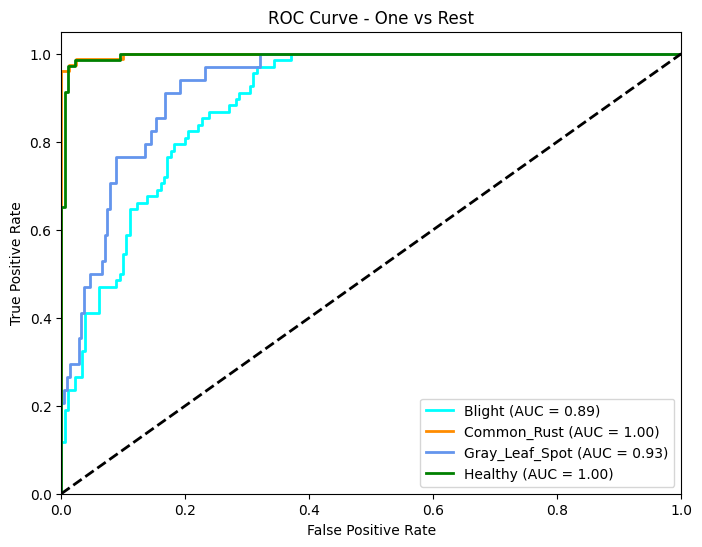

In [24]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

plt.figure(figsize=(8,6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], preds_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One vs Rest")
plt.legend(loc="lower right")
plt.show()




Preduct an Image


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Common_Rust


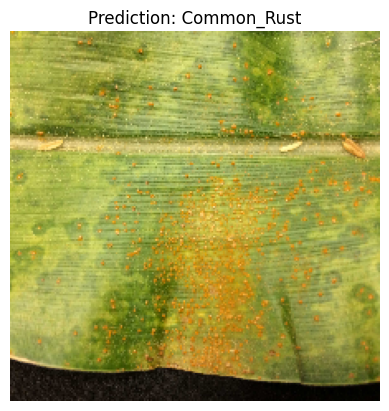

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Replace with the path to a single maize leaf image
test_img_path = r"C:\Users\USER\Documents\AI\computervision\computervision\test data\Common_Rust\Corn_Common_Rust (8).jpg"

# Load and preprocess image
img = image.load_img(test_img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred_proba = model.predict(img_array)
pred_class_index = np.argmax(pred_proba, axis=1)[0]
pred_class_name = class_names[pred_class_index]

# Show result
print(f"Predicted class: {pred_class_name}")
plt.imshow(img)
plt.title(f"Prediction: {pred_class_name}")
plt.axis('off')
plt.show()
